In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib as plt
import seaborn as sns
import cv2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
#from google.colab import drive
# drive.mount('/content/drive/')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
!pip install pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 1.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp38-cp38-macosx_12_0_x86_64.whl size=124607 sha256=6f1bde80689da7692e143d33998419988783e0eec06bc78ef62ffa4f84865f33
  Stored in directory: /Users/sabrinadaun/Library/Caches/pip/wheels/25/d4/61/dbd8edd1a0d656be7b4267c85db3b61951eb60016a0154a122
Successfully built pickle5


In [27]:
import pickle5 as pickle
with open('basic_model', "rb") as fh:
    basic_model = pickle.load(fh)

In [29]:
basic_model.evaluate(X_test_stack)

ValueError: in user code:

    File "/Users/sabrinadaun/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "/Users/sabrinadaun/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/sabrinadaun/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "/Users/sabrinadaun/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 1499, in test_step
        y_pred = self(x, training=False)
    File "/Users/sabrinadaun/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/sabrinadaun/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 75, 100, 3), found shape=(None, 224, 224, 3)


In [ ]:
with open('skin_224_224_pickle.pickle', "rb") as fh:
    skin_df = pickle.load(fh)

In [8]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_resized
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[187, 150, 192], [190, 154, 195], [192, 156,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[24, 13, 22], [25, 13, 23], [24, 14, 23], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[186, 127, 135], [188, 129, 137], [191, 135,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[23, 11, 15], [24, 11, 18], [24, 10, 19], [2..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[125, 83, 105], [132, 89, 112], [138, 93, 11..."
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033084.jpg,"[[[115, 92, 101], [108, 92, 96], [108, 91, 98]..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033550.jpg,"[[[4, 6, 3], [5, 6, 3], [6, 6, 5], [7, 8, 4], ..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033536.jpg,"[[[105, 92, 96], [109, 102, 103], [118, 109, 1..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../raw_data/HAM10000_all/ISIC_0032854.jpg,"[[[155, 115, 138], [158, 117, 138], [160, 121,..."


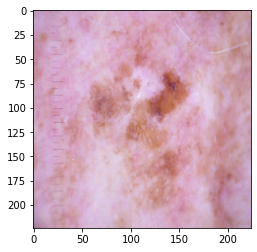

In [9]:
#check if images are displayed 
import matplotlib.pyplot as plt
plt.imshow(np.array(skin_df['image_resized'][0]))

In [10]:
y = skin_df['dx']

In [11]:
dict_target = {'bkl':0, 'nv':1, 'df':2, 'mel':3, 'vasc':4, 'bcc':5, 'akiec':6}

In [12]:
y_num = y.map(dict_target.get)

In [13]:
skin_df['target'] = y_num

In [14]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_resized,target
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[187, 150, 192], [190, 154, 195], [192, 156,...",0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[24, 13, 22], [25, 13, 23], [24, 14, 23], [2...",0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[186, 127, 135], [188, 129, 137], [191, 135,...",0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[23, 11, 15], [24, 11, 18], [24, 10, 19], [2...",0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[125, 83, 105], [132, 89, 112], [138, 93, 11...",0
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033084.jpg,"[[[115, 92, 101], [108, 92, 96], [108, 91, 98]...",6
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033550.jpg,"[[[4, 6, 3], [5, 6, 3], [6, 6, 5], [7, 8, 4], ...",6
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033536.jpg,"[[[105, 92, 96], [109, 102, 103], [118, 109, 1...",6
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../raw_data/HAM10000_all/ISIC_0032854.jpg,"[[[155, 115, 138], [158, 117, 138], [160, 121,...",6


In [15]:
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y_num, num_classes = 7)

In [16]:
y_cat.shape

(10015, 7)

In [17]:
X = skin_df['image_resized']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

In [19]:
X_train_stack = np.stack(X_train)

In [20]:
X_test_stack = np.stack(X_test)

In [21]:
X_train_stack.shape

(7010, 224, 224, 3)

## Model

In [22]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [23]:
def initialize_model():
    
    model = Sequential()
    model.add(layers.experimental.preprocessing.Rescaling(1. / 255))
    model.add(layers.Conv2D(16, (3,3), input_shape=(75, 100, 3), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(32, (2,2), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 
    model.add(layers.Flatten())
    model.add(layers.Dense(50, activation='relu')) # intermediate layer
    model.add(layers.Dense(7, activation='softmax'))
    
    return model

In [24]:
model = initialize_model()

2022-06-03 11:09:23.333997: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import Recall, Precision

def compile_model(model):
    model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy', # "sparse_" allows to avoid one-hot-encoding the target
    metrics = ['accuracy','Recall', 'Precision'])
    return model

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

model = initialize_model()
model = compile_model(model)

es = EarlyStopping(patience = 20, restore_best_weights = True)

history = model.fit(X_train_stack, y_train, 
                    validation_split = 0.3,
                    callbacks = [es], 
                    epochs = 200, 
                    batch_size = 32)

Epoch 1/200
 49/154 [========>.....................] - ETA: 47s - loss: 1.2148 - accuracy: 0.6492 - recall: 0.5332 - precision: 0.7504

KeyboardInterrupt: 

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

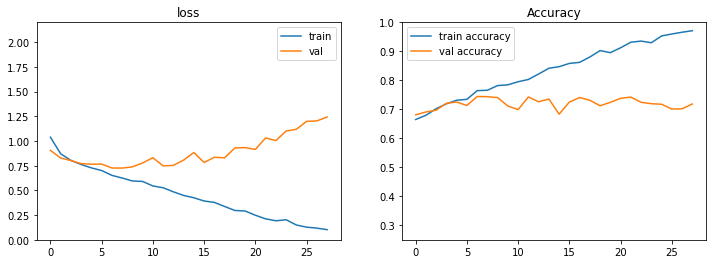

In [ ]:
plot_history(history)
plt.show()

## Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(X_train_stack)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1. / 255))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(
  optimizer = optimizer,
  loss = 'categorical_crossentropy', # "sparse_" allows to avoid one-hot-encoding the target
  metrics = ['accuracy','Recall', 'Precision'])

epochs = 30
batch_size = 32
model.fit_generator(datagen.flow(X_train_stack,y_train, batch_size=batch_size),
                              epochs = epochs,
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
220/220 [==============================] - 13s 56ms/step - loss: 1.0340 - accuracy: 0.6688 - recall: 0.5643 - precision: 0.7570
Epoch 2/30
220/220 [==============================] - 12s 55ms/step - loss: 0.9523 - accuracy: 0.6753 - recall: 0.5650 - precision: 0.8104
Epoch 3/30
220/220 [==============================] - 12s 55ms/step - loss: 0.8947 - accuracy: 0.6830 - recall: 0.5769 - precision: 0.8181
Epoch 4/30
220/220 [==============================] - 12s 55ms/step - loss: 0.8749 - accuracy: 0.6829 - recall: 0.5766 - precision: 0.8224
Epoch 5/30
220/220 [==============================] - 12s 55ms/step - loss: 0.8224 - accuracy: 0.6996 - recall: 0.5943 - precision: 0.8220
Epoch 6/30
220/220 [==============================] - 12s 55ms/step - loss: 0.7921 - accuracy: 0.7080 - recall: 0.6056 - precision: 0.8309
Epoch 7/30
220/220 [==============================] - 13s 59ms/step - loss: 0.7517 - accuracy: 0.7247 - recall: 0.6244 - precision: 0.8298
Epoch 8/30
220/220 [=======

In [ ]:
model.evaluate(X_test_stack,y_test)

94/94 [==============================] - 1s 6ms/step - loss: 0.6840 - accuracy: 0.7541 - recall: 0.6962 - precision: 0.8220


[0.6839607954025269,
 0.7540765404701233,
 0.6961730718612671,
 0.8220039010047913]

## InceptionV3

In [ ]:
from tf.keras.applications.inception_v3 import InceptionV3
#mobile = MobileNet()

In [7]:
! pip freeze

absl-py==1.0.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.2.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.4.0
audioread==2.1.9
autograd==1.4
Babel==2.10.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.4
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2022.5.18.1
cffi==1.15.0
cftime==1.6.0
chardet==3.0.4
charset-normalizer==2.0.12
click==7.1.2
cloudpickle==1.3.0
cmake==3.22.4
cmdstanpy==0.9.5
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.4.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda111==9.4.0
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.30
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
di

The model expects images to be stored as TFRecords -> convert images from raw JPEG files into TFRecords 

In [ ]:
# ADD SCRIPT FOR CONVERTING 

In [ ]:
def load_model():
    
    # $CHALLENGIFY_BEGIN
    
    model = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    
    # $CHALLENGIFY_END
    
    return model

In [ ]:
model = load_model()

In [ ]:
def set_nontrainable_layers(model):
    
    # $CHALLENGIFY_BEGIN
    # Set the first layers to be untrainable
    model.trainable = False
    
    # $CHALLENGIFY_END
    
    return model

In [ ]:
model = set_nontrainable_layers(model)

In [ ]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    # $CHALLENGIFY_BEGIN
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(7, activation='softmax')
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    # $CHALLENGIFY_END
    return model

In [ ]:
model = add_last_layers(model)

In [ ]:
from tensorflow.keras import optimizers

def build_model():
    # $CHALLENGIFY_BEGIN    
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model
    # $CHALLENGIFY_END

In [ ]:
model = build_model()

## alternative way to build transfer model

In [ ]:
# alternative way --------------------
import tensorflow
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten

mobile = tensorflow.keras.applications.mobilenet.MobileNet(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# CREATE THE MODEL ARCHITECTURE

# Exclude the last 5 layers of the above model.
# This will include all layers up to and including global_average_pooling2d_1
x = mobile.layers[-6].output

# Create a new dense layer for predictions
# 7 corresponds to the number of classes
x = Dropout(0.25)(x)
x = Flatten()(x)
predictions = Dense(7, activation='softmax')(x)

# inputs=mobile.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.

model = Model(inputs=mobile.input, outputs=predictions)

# We need to choose how many layers we actually want to be trained.

# Here we are freezing the weights of all layers except the
# last 23 layers in the new model.
# The last 23 layers of the model will be trained.

for layer in model.layers[:-23]:
    layer.trainable = False

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

## compile and fit

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import Recall, Precision


model.compile(
optimizer = 'adam',
loss = 'categorical_crossentropy', # "sparse_" allows to avoid one-hot-encoding the target
metrics = ['accuracy','Recall', 'Precision'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 20, restore_best_weights = True)

history = model.fit(X_train_stack, y_train, 
                    validation_split = 0.2,
                    callbacks = [es], 
                    epochs = 200)

Epoch 1/200
176/176 [==============================] - 9s 54ms/step - loss: 4.4914 - accuracy: 0.6118 - recall: 0.5938 - precision: 0.6315 - val_loss: 5.1857 - val_accuracy: 0.4408 - val_recall: 0.4387 - val_precision: 0.4418
Epoch 2/200
176/176 [==============================] - 9s 53ms/step - loss: 1.2188 - accuracy: 0.6960 - recall: 0.6735 - precision: 0.7279 - val_loss: 3.2510 - val_accuracy: 0.6441 - val_recall: 0.6427 - val_precision: 0.6468
Epoch 3/200
176/176 [==============================] - 9s 52ms/step - loss: 0.8890 - accuracy: 0.7548 - recall: 0.7311 - precision: 0.7815 - val_loss: 1.9672 - val_accuracy: 0.7026 - val_recall: 0.6983 - val_precision: 0.7063
Epoch 4/200
176/176 [==============================] - 9s 51ms/step - loss: 0.6056 - accuracy: 0.8318 - recall: 0.8128 - precision: 0.8480 - val_loss: 5.1743 - val_accuracy: 0.4158 - val_recall: 0.4158 - val_precision: 0.4158
Epoch 5/200
176/176 [==============================] - 9s 51ms/step - loss: 0.4830 - accuracy: 0

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test_stack,y_test)

94/94 [==============================] - 4s 38ms/step - loss: 1.2469 - accuracy: 0.6935 - recall: 0.6516 - precision: 0.7436


[1.2469152212142944,
 0.6935108304023743,
 0.6515806913375854,
 0.7436384558677673]

## Save Model

In [ ]:
# RENAME JOBLIB MODEL FILE!!!!

import joblib
joblib.dump(model, '/content/drive/My Drive/models/basis_with_aug_model.joblib')

INFO:tensorflow:Assets written to: ram://99a701c7-1193-49d6-aa00-b387ec130405/assets


['/content/drive/My Drive/basis_with_aug_model.joblib']

In [ ]:
joblib_model = joblib.load('/content/drive/My Drive/models/basis_with_aug_model.joblib')

In [ ]:
joblib_model.evaluate(X_test_stack, y_test)

94/94 [==============================] - 1s 6ms/step - loss: 0.6601 - accuracy: 0.7577 - recall: 0.7231 - precision: 0.8136


[0.6601415276527405, 0.7577371001243591, 0.7231281399726868, 0.813552975654602]